<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/environment/blob/main/temperature_changes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("/content/drive/MyDrive/환경/climate_change/FAOSTAT_data_11-24-2020.csv")
df1 = pd.read_csv("/content/drive/MyDrive/환경/climate_change/FAOSTAT_data_1-10-2022.csv")
df3 = pd.read_csv("/content/drive/MyDrive/환경/climate_change/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='cp1252')

# EDA

In [6]:
temp_df =  df3.copy()

In [7]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

In [8]:
temp_df.isnull().sum()

,0
Area Code,0
Area,0
Months Code,0
Months,0
Element Code,0
...,...
Y2015,1295
Y2016,1308
Y2017,1290
Y2018,1307


In [9]:
len(temp_df.Area.unique())

284

In [10]:
temp_df = temp_df.rename(columns = {'Area Code':'area_code', 'Area':'area', 'Months Code':'months_code','Months':'months','Element Code':'element_code','Element':'element','Unit':'unit'})

In [11]:
temp_df.drop(temp_df[temp_df.element_code == 6078].index , inplace = True)

In [12]:
temp_df

,area_code,area,months_code,months,element_code,element,unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,5873,OECD,7016,Dec–Jan–Feb,7271,Temperature change,°C,0.561,-0.362,-0.222,...,1.272,0.770,1.709,1.327,0.686,1.307,2.636,1.884,1.453,1.527
9648,5873,OECD,7017,Mar–Apr–May,7271,Temperature change,°C,-0.038,-0.189,0.141,...,1.742,0.390,1.442,0.475,0.778,1.191,1.928,1.237,1.241,1.352
9650,5873,OECD,7018,Jun–Jul–Aug,7271,Temperature change,°C,0.101,0.052,-0.047,...,1.012,0.954,1.061,1.119,0.779,0.958,1.303,1.081,1.078,1.078
9652,5873,OECD,7019,Sep–Oct–Nov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233


In [13]:
temp_df.drop(temp_df[temp_df.element_code == 6078].index , inplace = True)

In [14]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
temp_months = temp_df[temp_df['months'].isin(months)]

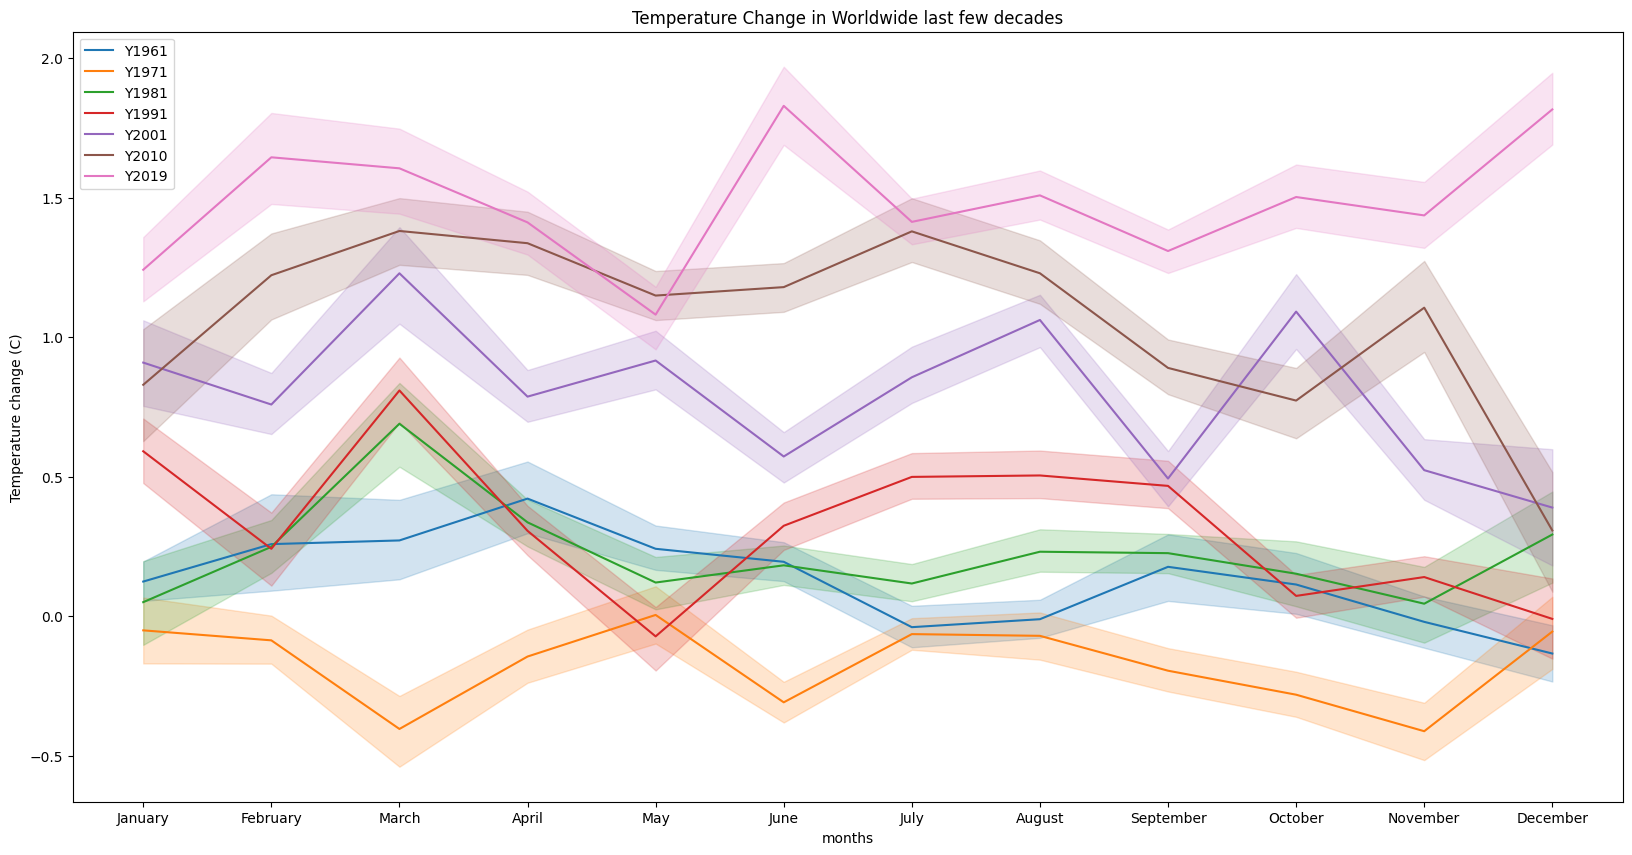

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1961.loc[temp_months.element=='Temperature change'], label='Y1961')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1971.loc[temp_months.element=='Temperature change'], label='Y1971')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1981.loc[temp_months.element=='Temperature change'], label='Y1981')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y1991.loc[temp_months.element=='Temperature change'], label='Y1991')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2001.loc[temp_months.element=='Temperature change'], label='Y2001')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2010.loc[temp_months.element=='Temperature change'], label='Y2010')
sns.lineplot(x=temp_months.months.loc[temp_months.element=='Temperature change'],y=temp_months.Y2019.loc[temp_months.element=='Temperature change'], label='Y2019')
plt.xlabel('months')
plt.ylabel('Temperature change (C)')
plt.title('Temperature Change in Worldwide last few decades')
plt.show()

In [16]:
temp_year = temp_df[(temp_df["months"]=="Meteorological year")]
temp_year = temp_year.drop(["area_code","months_code","months","element","element_code","unit"],axis=1)
temp_year = temp_year.T
temp_year.columns = temp_year.loc['area']
temp_year.drop('area', inplace = True)
Continents = temp_year[["Africa","Asia","Europe","Northern America","South America","Australia","Antarctica"]]
Continents=Continents.rename(columns={"Northern America":"N_America","South America":"S_America"})
Continents.reset_index(level=0, inplace=True)
Continents=Continents.rename(columns={"index":"Year"})
idx = Continents.columns[1:].tolist()


In [17]:
fig = px.line(Continents, x=Continents.Year, y=Continents.columns[1:],
              title='Temperature in °C over countries', width=1500)

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([dict(label="None",
                     method="update",
                     args=[{"visible": [True for _ in range(186)]},
                           {"title": "Temperature in °C over continents",
                            "annotations": []}])]) + list([
                dict(label=f"{j}",
                     method="update",
                     args=[{"visible": [True if i==idx else False for i in range(186)]},
                           {"title": f"{j}",
                            "annotations": []}]) for idx,j in enumerate(Continents.columns[1:])])
            )])

fig.show()

In [18]:
temp = temp_df.melt(id_vars=['area_code','area','months','months_code', 'element','element_code',
       'unit'],var_name='Year', value_name='temperature')
temp = temp.drop(columns = ['area_code', 'months_code',  'element_code'])
temp = temp[temp['months'] == 'Meteorological year']

In [19]:
Top_countries = temp.groupby('area',).sum().sort_values('temperature', ascending=False)[:10].reset_index()['area']

In [20]:
Top_countries

,area
0,Mongolia
1,Svalbard and Jan Mayen Islands
2,Gambia
3,Morocco
4,Guinea-Bissau
5,Tunisia
6,Mauritania
7,Eastern Europe
8,Austria
9,Senegal
